In [5]:
import pandas as pd
import os

In [6]:
# Load the data from the CSV file
file_path = 'D:/GitHub/wine_reviews.csv'  # Adjust this path if necessary
wine_data_reviews = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print(wine_data_reviews.head())


                                              review
0  Easily the best Sauvignon Blanc I've had to da...
1                      Excellent, Mockingbird Inn?\n
2  Absolutely incredible. One of the best sauvign...
3                   Reported in nytimes. Did not try
4  Great. Much different than other Sauv Blancs s...


In [7]:
from transformers import pipeline
#classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", framework="pt")
classifier = pipeline("zero-shot-classification", model="cross-encoder/nli-distilroberta-base", framework="pt")


d:\GitHub\Wine_Data_Dashbord\myenv2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


In [8]:
labels = [
    "talks about food combinations", 
    "talks about taste", 
    "talks about value for money", 
    "other"
]

# Apply the zero-shot classifier to each review
def classify_review(review):
    if pd.isnull(review):  # Handle missing reviews
        return "other"
    result = classifier(review, labels)
    return result["labels"][0]  # Return the top label

# Create a new column "talks_about" to store the predicted labels
wine_data_reviews["talks_about"] = wine_data_reviews["review"].apply(classify_review)

# Display the updated DataFrame
print(wine_data_reviews.head())

                                              review  \
0  Easily the best Sauvignon Blanc I've had to da...   
1                      Excellent, Mockingbird Inn?\n   
2  Absolutely incredible. One of the best sauvign...   
3                   Reported in nytimes. Did not try   
4  Great. Much different than other Sauv Blancs s...   

                     talks_about  
0  talks about food combinations  
1              talks about taste  
2              talks about taste  
3                          other  
4                          other  


In [9]:
output_path = 'D:/GitHub/wine_data_reviews_with_labels.csv'
wine_data_reviews.to_csv(output_path, index=False)
print(f"Updated dataset saved to {output_path}")

Updated dataset saved to D:/GitHub/wine_data_reviews_with_labels.csv


In [10]:
import matplotlib.pyplot as plt


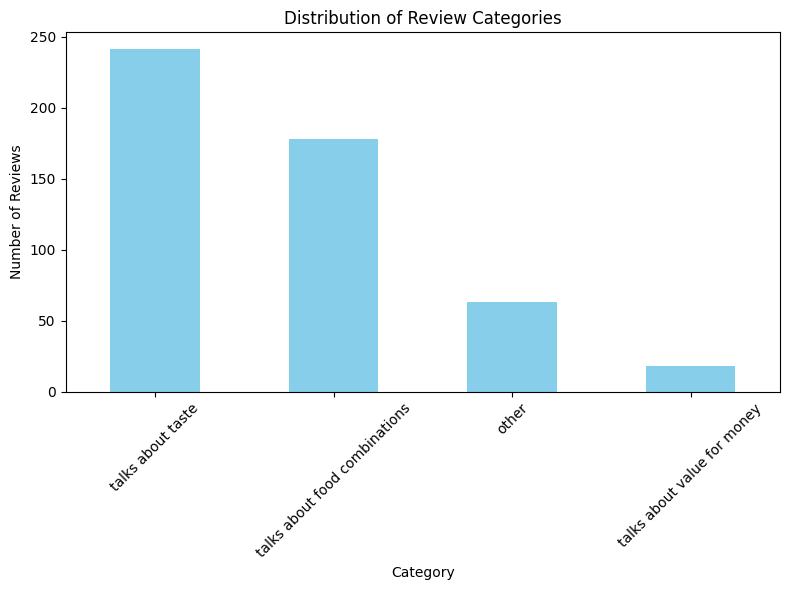

In [11]:
# Plot the distribution of the predicted categories
category_counts = wine_data_reviews["talks_about"].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Review Categories')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()